In [10]:
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from sklearn import tree
import numpy as np

In [14]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)


In [15]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [16]:
X.shape, y.shape

((150, 2), (150,))

In [17]:
# number of classes
np.unique(y).shape

(3,)

In [19]:
tree_clf = tree.DecisionTreeClassifier(max_depth=None, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(random_state=42)

[Text(0.5, 0.9166666666666666, 'x[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4090909090909091, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.4545454545454546, 0.8333333333333333, 'True  '),
 Text(0.5909090909090909, 0.75, 'x[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5454545454545454, 0.8333333333333333, '  False'),
 Text(0.36363636363636365, 0.5833333333333334, 'x[0] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.18181818181818182, 0.4166666666666667, 'x[1] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.09090909090909091, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.2727272727272727, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5454545454545454, 0.4166666666666667, 'x[1] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.45454545454545453, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.6363636363636364, 0.25, 'x

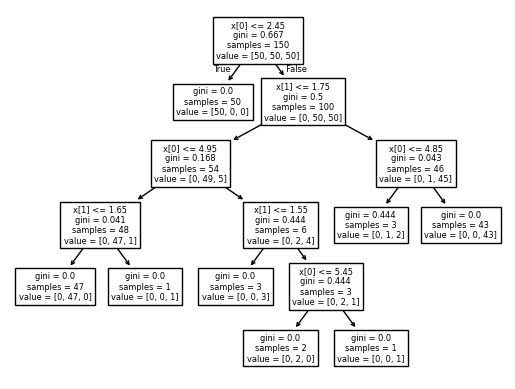

In [20]:
tree.plot_tree(tree_clf)

Text(3.2, 1.8, 'Depth=1')

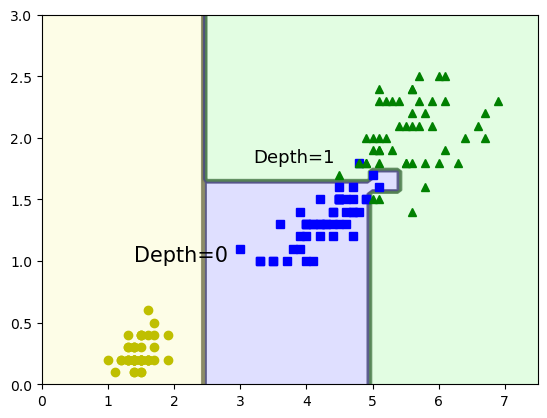

In [21]:
plot_decision_boundary(tree_clf, X, y)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)

In [22]:
tree_clf.get_depth()

5

In [23]:
for name, score in zip(["length", "wedith"], tree_clf.feature_importances_):
    print(name, score)

length 0.5716783359446403
wedith 0.4283216640553596


In [30]:
tree_clf2 = tree.DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf2.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(0.5, 0.75, 'x[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.625, 0.5, '  False')]

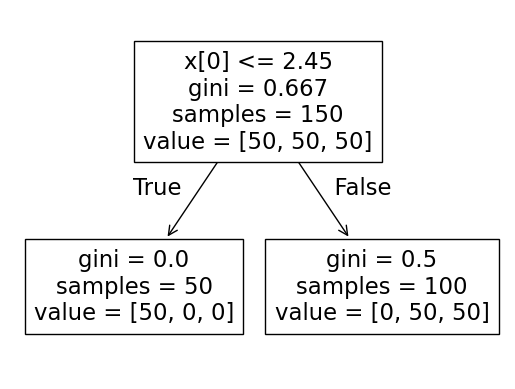

In [28]:
tree.plot_tree(tree_clf2)

Text(3.2, 1.8, 'Depth=1')

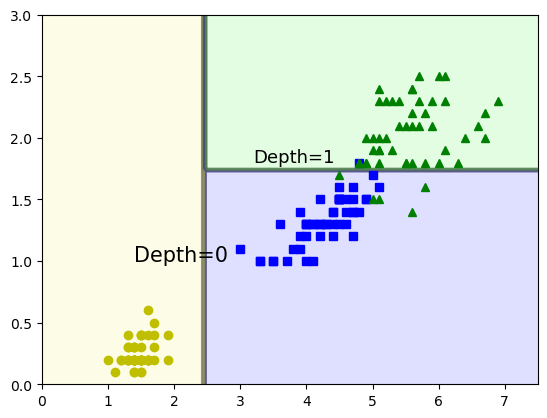

In [31]:
plot_decision_boundary(tree_clf2, X, y)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)